In [1]:
import astropy.io.fits as fits
from astropy import wcs
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import ctapipe
from astropy.coordinates import SkyCoord, AltAz

from ctapipe.coordinates import (
    GroundFrame,
    TiltedGroundFrame,
    NominalFrame,
    TelescopeFrame,
    CameraFrame
)
from matplotlib.colors import LogNorm

from ctapipe.instrument import CameraGeometry
from astropy.time import Time
from astropy.coordinates import EarthLocation
import astropy.units as u
from astropy.wcs import WCS
from astropy.wcs import Wcsprm
from astropy.io import fits
import numpy as np
from astropy.wcs import utils

In [7]:
obstime = Time("2023-01-12T19:06:21")
location = EarthLocation.from_geodetic(lon=16.500974,lat=-23.271536,height=1800*u.m)

altaz = AltAz(location=location, obstime=obstime)
'''
telescope_pointing = SkyCoord(
    '06h22m23s -26 05 47', unit=(u.hourangle, u.deg)
)'''
telescope_pointing=SkyCoord(ra=96.152*u.deg,dec=-26.096*u.deg)

telescope_pointing=telescope_pointing.transform_to(altaz)
print(telescope_pointing)
geometry = CameraGeometry.from_name('FlashCam')
pix_x = geometry.pix_x
pix_y = geometry.pix_y
focal_length=36.0*u.m

camera_frame = CameraFrame(
    focal_length=focal_length,
    rotation=0*u.deg,
    telescope_pointing=telescope_pointing,location=location,obstime=obstime
)

cam_coords = SkyCoord(x=pix_x, y=pix_y, frame=camera_frame)
cam_coords = cam_coords.transform_to('icrs')
print(cam_coords)
print(dir(cam_coords))

<SkyCoord (AltAz: obstime=2023-01-12T19:06:21.000, location=(5622439.55010887, 1665546.43488214, -2505083.50799416) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (103.01414423, 53.03368202)>
<SkyCoord (ICRS): (ra, dec) in deg
    [(95.84319166, -25.99782833), (95.77051895, -26.04329927),
     (95.85070514, -26.0771171 ), ..., (94.50725138, -24.73738567),
     (94.57299599, -24.61318762), (94.5006859 , -24.65804271)]>
['T', '_APPLICABLE_FUNCTIONS', '_METHOD_FUNCTIONS', '__abstractmethods__', '__array_function__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook_

In [8]:
x=fits.open('new-image.fits')
wcs=fits.open('wcs.fits')

In [9]:
print(fits.info('new-image.fits'))


Filename: new-image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     727   (1186, 907, 3)   uint8   
None


In [10]:
wcs = WCS(wcs[0].header)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 68.379652171  -23.2121115932  
CRPIX : 800.829345703  532.025563558  
CD1_1 CD1_2  : -0.0507232820259  0.00262969362525  
CD2_1 CD2_2  : -0.00226338916184  -0.050352654283  
NAXIS : 0  0
(3, 907, 1186)


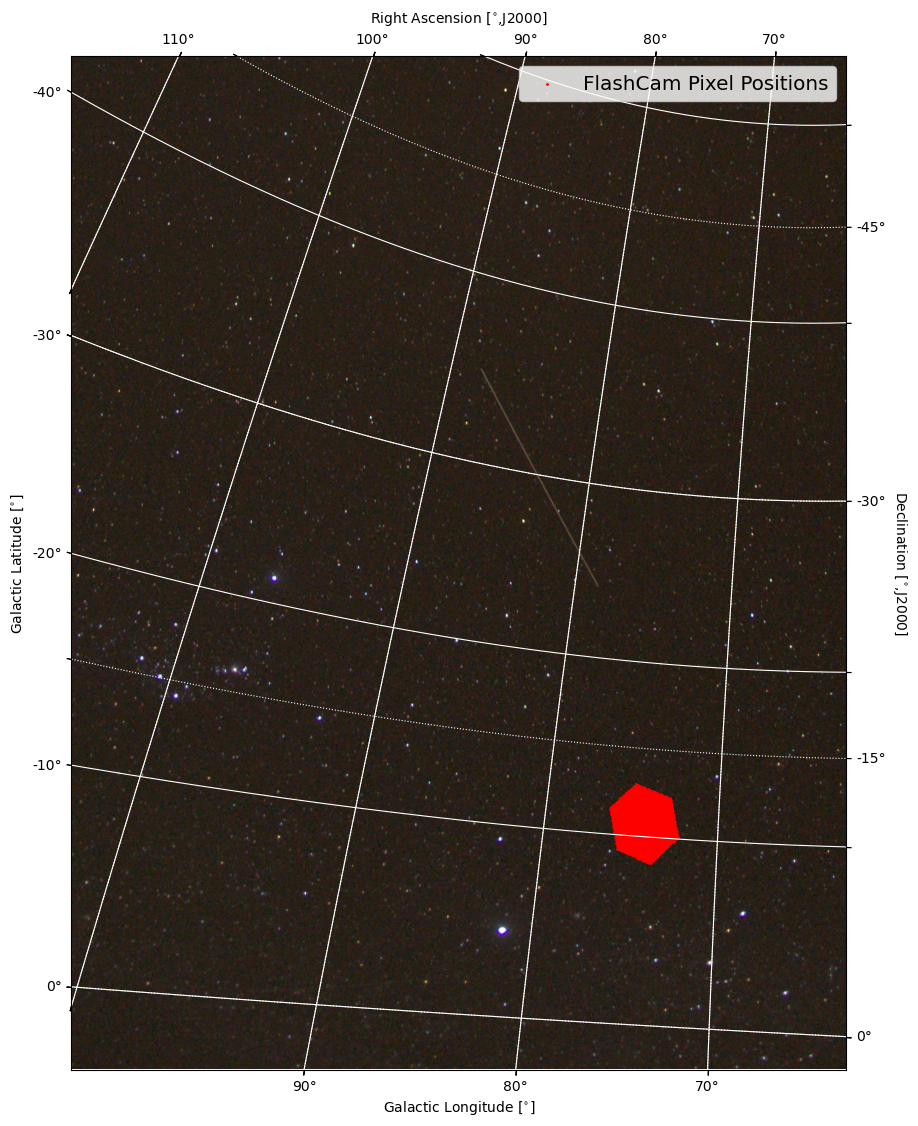

In [11]:
print(wcs)
hdu=x[0]
print(x[0].data.shape)
fig=plt.figure(figsize=(10,30))
target = utils.skycoord_to_pixel(cam_coords, wcs)

plt.subplot(projection=wcs)
plt.imshow(np.swapaxes(x[0].data,0,2), origin='lower')
ax=plt.gca()
plt.scatter(target[1],target[0], s=1, facecolors='red', edgecolors='red',label='FlashCam Pixel Positions')
plt.legend(fontsize='x-large')
ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Longitude [$^{\circ}$]')
ax.coords[1].set_axislabel('Galactic Latitude [$^{\circ}$]')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension [$^{\circ}$,J2000]')
overlay[1].set_axislabel('Declination [$^{\circ}$,J2000]')
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('d')
lat.set_major_formatter('d')

plt.savefig('felixtrail.png',dpi=300)

In [ ]:
from astropy.visualization import simple_norm

obstime = Time("2023-01-12T19:20:07")
location = EarthLocation.from_geodetic(lon=16.500974,lat=-23.271536,height=1800*u.m)

altaz = AltAz(location=location, obstime=obstime)

telescope_pointing = SkyCoord(
    '06h22m23s -26 05 47', unit=(u.hourangle, u.deg)
)
telescope_pointing=telescope_pointing.transform_to(altaz)
print(telescope_pointing)
geometry = CameraGeometry.from_name('FlashCam')
pix_x = geometry.pix_x
pix_y = geometry.pix_y
focal_length=36.0*u.m

camera_frame = CameraFrame(
    focal_length=focal_length,
    rotation=0*u.deg,
    telescope_pointing=telescope_pointing,location=location,obstime=obstime
)

cam_coords = SkyCoord(x=pix_x, y=pix_y, frame=camera_frame)
cam_coords = cam_coords.transform_to('icrs')
print(cam_coords)
print(dir(cam_coords))
x=fits.open('new-image2.fits')
wcs=fits.open('wcs2.fits')
wcs = WCS(wcs[0].header)
hdu=x[0]
print(x[0].data.shape)
fig=plt.figure(figsize=(9,6))
target = utils.skycoord_to_pixel(cam_coords, wcs)

plt.subplot(projection=wcs)
image = np.swapaxes(x[0].data,0,2)
print(np.shape(image))
image=image[:500,:,:]
plt.imshow(image,origin='lower')
ax=plt.gca()
plt.scatter(target[1],target[0], s=1, facecolors='red', edgecolors='red',label='FlashCam Pixel Positions',alpha=0.1)
plt.legend(fontsize='x-large')
ax.coords.grid(True, color='white', ls='solid',alpha=0.2)
ax.coords[0].set_axislabel('Galactic Longitude [$^{\circ}$]')
ax.coords[1].set_axislabel('Galactic Latitude [$^{\circ}$]')
#ax.set_ylim(-30,-10)
overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted',alpha=0.2)
overlay[0].set_axislabel('Right Ascension [$^{\circ}$, J2000]')
overlay[1].set_axislabel('Declination [$^{\circ}$, J2000]')
lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('d')
lat.set_major_formatter('d')
plt.savefig('felixtrail2.png',dpi=1000)